### Web Scraping Code (Top 50 Books)

In [11]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd

# Specify the url
base_site = "https://www.goodreads.com/shelf/show/top-50"

# Make http request
response = requests.get(base_site)

# Check if request is successful. Status code of 200 indicates a successful attempt.
response.status_code

# Get the html from webpage
html = response.content

# Creating a BeautifulSoup object with the use of a parser
soup = BeautifulSoup(html, "lxml")

# Exporting html file
with open('top50books.html', 'wb') as file:
    file.write(soup.prettify('utf-8'))
    
#### Extracting the url addresses of each book link ####

# First layer: The element that contains all the data
divs = soup.find_all("div", {"class": "elementList"})

# Second layer: Extracting html tags that contain the links
links = [div.find('a') for div in divs]

# Extracting the partial links  
relative_url = [link['href'] for link in links]  

# Computing the full url addresses 
full_url = [urljoin(base_site, relativeurl) for relativeurl in relative_url]

# Filter only the book links
book_url = [url for url in full_url if "https://www.goodreads.com/book/show" in url]

#### Scraping information of each book using for loop ####

book_description = []
book_title = []

#creating a loop counter
i = 0

#Loop through all 50 books
for url in book_url:
    
    #connect to url page
    note_resp = requests.get(url)
    
    #checking if the request is successful
    if note_resp.status_code == 200:
        print("URL{}: {}".format(i+1, url))
    
    else:
        print('Status code{}: Skipping URL #{}: {}'.format(note_resp.status_code, i+1, url))
        i = i+1
        continue
    
    #get HTML from url page
    note_html = note_resp.content
    
    #create beautifulsoup object for url page
    note_soup = BeautifulSoup(note_html, 'html.parser')

    #Extract title particulars
    title_divs = note_soup.find_all("div", {"class": "BookPageTitleSection"})
    title_text = title_divs[0].find_all('h1')[0].text
    #<div class="BookPageTitleSection"><div class="BookPageTitleSection__title"><h1 class="Text Text__title1" data-testid="bookTitle" aria-label="Book title: Jane Eyre">Jane Eyre</h1></div><div class="BookPageTitleSection__share"><div class="Button__container"><button type="button" class="Button Button--transparent Button--small Button--rounded" aria-label="Share"><span class="Button__labelItem"><i class="Icon ShareIcon"><svg viewBox="0 0 24 24"><path d="M16.5 2C18.433 2 20 3.567 20 5.5C20 7.433 18.433 9 16.5 9C15.6752 9 14.917 8.71467 14.3187 8.23733L10.6119 10.3965C10.8599 10.8769 11 11.4221 11 12C11 12.619 10.8393 13.2006 10.5573 13.7051L14.2507 15.8184C14.859 15.3076 15.6436 15 16.5 15C18.433 15 20 16.567 20 18.5C20 20.433 18.433 22 16.5 22C14.567 22 13 20.433 13 18.5C13 17.9703 13.1177 17.4681 13.3283 17.0181L9.62754 14.901C9.59678 14.8834 9.56774 14.8639 9.54048 14.8429C8.9661 15.2568 8.26144 15.5 7.5 15.5C5.567 15.5 4 13.933 4 12C4 10.067 5.567 8.5 7.5 8.5C8.30519 8.5 9.04687 8.77189 9.63824 9.22888L13.364 7.056C13.131 6.58729 13 6.05895 13 5.5C13 3.567 14.567 2 16.5 2ZM16.5 16.5C15.3954 16.5 14.5 17.3954 14.5 18.5C14.5 19.6046 15.3954 20.5 16.5 20.5C17.6046 20.5 18.5 19.6046 18.5 18.5C18.5 17.3954 17.6046 16.5 16.5 16.5ZM7.5 10C6.39543 10 5.5 10.8954 5.5 12C5.5 13.1046 6.39543 14 7.5 14C8.60457 14 9.5 13.1046 9.5 12C9.5 10.8954 8.60457 10 7.5 10ZM16.5 3.5C15.3954 3.5 14.5 4.39543 14.5 5.5C14.5 6.60457 15.3954 7.5 16.5 7.5C17.6046 7.5 18.5 6.60457 18.5 5.5C18.5 4.39543 17.6046 3.5 16.5 3.5Z"></path></svg></i></span></button></div></div></div>
    book_title.append(title_text)
    
    #Extracting description particulars
    description_divs = note_soup.find_all("div", {"class": "DetailsLayoutRightParagraph__widthConstrained"})
    #<div class="DetailsLayoutRightParagraph__widthConstrained"><span class="Formatted"><i>Alternate editions can be found <a href="https://www.goodreads.com/book/show/59701670">here</a> and <a href="https://www.goodreads.com/book/show/11016">here</a></i>.<br><br><b>A gothic masterpiece of tempestuous passions and dark secrets, Charlotte Brontë's <i>Jane Eyre</i> is edited with an introduction and notes by Stevie Davis in Penguin Classics.</b><br><br>Charlotte Brontë tells the story of orphaned Jane Eyre, who grows up in the home of her heartless aunt, enduring loneliness and cruelty. This troubled childhood strengthens Jane's natural independence and spirit - which prove necessary when she finds employment as a governess to the young ward of Byronic, brooding Mr Rochester. As her feelings for Rochester develop, Jane gradually uncovers Thornfield Hall's terrible secret, forcing her to make a choice. Should she stay with Rochester and live with the consequences, or follow her convictions - even if it means leaving the man she loves? A novel of intense power and intrigue, <i>Jane Eyre</i> dazzled readers with its passionate depiction of a woman's search for equality and freedom.</span></div>
    try:
        description_text = description_divs[0].find_all("span")[1].text
    except IndexError:
        try:
            description_text = description_divs[0].find_all("span")[0].text
        except IndexError:
            description_text = "Nil"
    book_description.append(description_text)
        
    #Incremeting the loop counter
    i = i+1
    
#### Some simple data processing ####

revised_book_title = [book.strip() for book in book_title]

revised_book_description = [description.strip() for description in book_description]

#### Organising the data into a dataframe ####

book_df = pd.DataFrame()

book_df["Book Title"] = revised_book_title
book_df["Description"] = revised_book_description
#book_df["Links"] = book_url

#Preview dataframe
book_df.head()

# Export dataframe
book_df.to_csv("top50books.csv")

URL1: https://www.goodreads.com/book/show/10210.Jane_Eyre
URL2: https://www.goodreads.com/book/show/4671.The_Great_Gatsby
URL3: https://www.goodreads.com/book/show/61439040-1984
URL4: https://www.goodreads.com/book/show/1885.Pride_and_Prejudice
URL5: https://www.goodreads.com/book/show/168668.Catch_22
URL6: https://www.goodreads.com/book/show/6185.Wuthering_Heights
URL7: https://www.goodreads.com/book/show/320.One_Hundred_Years_of_Solitude
URL8: https://www.goodreads.com/book/show/18114322-the-grapes-of-wrath
URL9: https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird
URL10: https://www.goodreads.com/book/show/5107.The_Catcher_in_the_Rye
URL11: https://www.goodreads.com/book/show/656.War_and_Peace
URL12: https://www.goodreads.com/book/show/15823480-anna-karenina
URL13: https://www.goodreads.com/book/show/3836.Don_Quixote
URL14: https://www.goodreads.com/book/show/72193.Harry_Potter_and_the_Philosopher_s_Stone
URL15: https://www.goodreads.com/book/show/2175.Madame_Bovary
URL16:

In [12]:
book_df.head()

,Book Title,Description
0,Jane Eyre,Alternate editions can be found here and here....
1,The Great Gatsby,Alternate Cover Edition ISBN: 0743273567 (ISBN...
2,1984,The new novel by George Orwell is the major wo...
3,Pride and Prejudice,"Since its immediate success in 1813, Pride and..."
4,Catch-22,"Fifty years after its original publication, Ca..."


### Data Pre-processing / Clean-up Code

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import string
import re
from spellchecker import SpellChecker

def text_preprocessing(text):
    
    text_dict = {}
    
    # Remove URLs and email addresses and extra whitespaces and numbers and special characters
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    email_pattern = r'\S+@\S+'
    white_space = r'\s+'
    numbers_special_characters = r'[^A-Za-z\s]'
    text = re.sub(url_pattern, '', text)
    text = re.sub(email_pattern, '', text)
    text = re.sub(white_space, ' ', text)
    text = re.sub(numbers_special_characters, '', text)
    
    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Spell checking NOT WORKING BREAKIN CODE
    #spell = SpellChecker()
    #tokens = [spell.correction(word) for word in tokens]
        
    return tokens

In [25]:
# Pre-process training, development, and test data
book_df['Clean_text'] = book_df['Description'].apply(lambda x: text_preprocessing(x))

# Covnert tokens to strings for Count vectorization
book_df['String'] = book_df['Clean_text'].apply(lambda x: ' '.join(x))

In [26]:
book_df.head()

,Book Title,Description,Clean_text,String
0,Jane Eyre,Alternate editions can be found here and here....,"[altern, edit, found, herea, gothic, masterpie...",altern edit found herea gothic masterpiec temp...
1,The Great Gatsby,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"[altern, cover, edit, isbn, isbn, great, gatsb...",altern cover edit isbn isbn great gatsbi f sco...
2,1984,The new novel by George Orwell is the major wo...,"[new, novel, georg, orwel, major, work, toward...",new novel georg orwel major work toward previo...
3,Pride and Prejudice,"Since its immediate success in 1813, Pride and...","[sinc, immedi, success, pride, prejudic, remai...",sinc immedi success pride prejudic remain one ...
4,Catch-22,"Fifty years after its original publication, Ca...","[fifti, year, origin, public, catch, remain, c...",fifti year origin public catch remain cornerst...


### LSA Implementation Code using Gensim (Python Library for vectorization, etc.)

In [32]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix


def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel


def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

start,stop,step=2,12,1
#plot_graph(book_df['Clean_text'],start,stop,step)


# LSA Model
number_of_topics=15
words=50
model=create_gensim_lsa_model(book_df['Clean_text'],number_of_topics,words)


[(0, '0.434*"book" + 0.334*"peopl" + 0.260*"covey" + 0.230*"model" + 0.175*"understand" + 0.169*"life" + 0.166*"tri" + 0.162*"ideal" + 0.141*"first" + 0.132*"stephen" + 0.125*"live" + 0.121*"read" + 0.119*"success" + 0.111*"novel" + 0.107*"problem" + 0.098*"alreadi" + 0.098*"us" + 0.097*"implement" + 0.097*"work" + 0.094*"becom" + 0.083*"make" + 0.081*"edit" + 0.081*"one" + 0.078*"around" + 0.077*"inform" + 0.074*"realiz" + 0.073*"use" + 0.072*"habit" + 0.072*"way" + 0.072*"mani" + 0.070*"see" + 0.069*"end" + 0.067*"effect" + 0.067*"thing" + 0.066*"human" + 0.065*"yet" + 0.065*"lifebut" + 0.065*"seven" + 0.065*"aspect" + 0.065*"educ" + 0.065*"lot" + 0.064*"take" + 0.055*"two" + 0.052*"masterpiec" + 0.050*"everi" + 0.050*"world" + 0.048*"new" + 0.047*"begin" + 0.046*"year" + 0.046*"true"'), (1, '0.379*"novel" + 0.328*"edit" + 0.200*"one" + 0.171*"work" + -0.163*"book" + 0.160*"new" + -0.150*"covey" + -0.140*"peopl" + -0.125*"model" + 0.124*"human" + 0.122*"love" + 0.109*"includ" + 0.108

### Data Pre-Processing again hopefully this one is better LOL

In [35]:
book_df_2 = pd.DataFrame(book_df.drop(['Clean_text', 'String'], axis = 1))

# removing everything except alphabets`
book_df_2['Clean_text'] = book_df_2['Description'].str.replace("[^a-zA-Z#]", " ")

# removing short words
book_df_2['Clean_text'] = book_df_2['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
book_df_2['Clean_text'] = book_df_2['Clean_text'].apply(lambda x: x.lower())

# tokenization
tokenized_doc = book_df_2['Clean_text'].apply(lambda x: x.split())

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(book_df_2)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

book_df_2['Clean_text'] = detokenized_doc

/var/folders/j1/1yf4p72d5qn097_6xdrl6cf00000gn/T/ipykernel_45754/2566231341.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  book_df_2['Clean_text'] = book_df_2['Description'].str.replace("[^a-zA-Z#]", " ")


,Book Title,Description,Clean_text
0,Jane Eyre,Alternate editions can be found here and here....,alternate editions found gothic masterpiece te...
1,The Great Gatsby,Alternate Cover Edition ISBN: 0743273567 (ISBN...,alternate cover edition isbn isbn great gatsby...
2,1984,The new novel by George Orwell is the major wo...,novel george orwell major work towards previou...
3,Pride and Prejudice,"Since its immediate success in 1813, Pride and...",since immediate success pride prejudice remain...
4,Catch-22,"Fifty years after its original publication, Ca...",fifty years original publication catch remains...


### Document-Matrix Creation (First step of LSA)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(book_df_2['Clean_text'])

X.shape # check shape of the document-term matrix

(50, 1000)

###  The next step is to represent each and every term and document as a vector.  
### We will use the document-term matrix and decompose it into multiple matrices. 
### We will use sklearn’s TruncatedSVD to perform the task of matrix decomposition.  
### The number of topics can be specified by using the n_components parameter. Trying aribtrary number of 15 topics


In [42]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=15, algorithm='randomized', n_iter=100, random_state=122)

#svd_model.fit(X)
X_topics = svd_model.fit_transform(X)

len(svd_model.components_)

15

### The components of svd_model are our topics, and we can access them using svd_model.components_.  
### Finally, print a few most important words in each of the 15 topics and see how our model has done.

In [40]:

terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        #print(" ")

Topic 0: 
novel
harry
edition
love
story
literature
life
Topic 1: 
harry
hogwarts
potter
school
witchcraft
wizardry
summer
Topic 2: 
people
book
ways
covey
love
work
carnegie
Topic 3: 
love
story
tells
brilliant
humbert
come
chronicles
Topic 4: 
edition
text
hobbit
ring
hole
great
ulysses
Topic 5: 
ring
hobbit
earth
ender
dark
hole
lord
Topic 6: 
jane
tolstoy
characters
austen
elizabeth
alternate
isbn
Topic 7: 
jane
austen
elizabeth
mind
alternate
work
eyre
Topic 8: 
ring
deep
black
century
novels
ellison
invisible
Topic 9: 
ring
hobbit
hole
jane
great
people
book
Topic 10: 
century
novels
black
humbert
beautiful
haunted
twentieth
Topic 11: 
flaubert
jane
ring
novel
literary
realism
bovary
Topic 12: 
clarissa
work
novel
looking
humbert
mind
terror
Topic 13: 
great
gatsby
raskolnikov
murder
quixote
isbn
readers
Topic 14: 
sethe
death
survival
sister
live
capitol
districts


### Visualize data via clusters on graph

['abandoned', 'ability', 'acclaimed', 'achieve', 'achievement', 'acquires', 'actionable', 'actually', 'adventure', 'adventures', 'advice', 'ages', 'ahead', 'aldous', 'alienation', 'alike', 'alternate', 'america', 'american', 'ancient', 'anna', 'anne', 'anthony', 'apocalypse', 'approach', 'army', 'artist', 'aspect', 'attempt', 'aunt', 'austen', 'author', 'award', 'baggins', 'based', 'battle', 'beautiful', 'begin', 'begins', 'believe', 'beloved', 'best', 'bestseller', 'betrayed', 'betrays', 'better', 'bilbo', 'black', 'book', 'books', 'boredom', 'bovary', 'brave', 'brilliant', 'bring', 'bront', 'brooding', 'building', 'burgess', 'business', 'california', 'called', 'came', 'capitol', 'carnegie', 'case', 'catch', 'century', 'changed', 'chapter', 'character', 'characters', 'charlotte', 'child', 'childhood', 'children', 'choice', 'choices', 'chronicles', 'chronology', 'city', 'civilization', 'clarissa', 'class', 'classic', 'classics', 'clockwork', 'close', 'come', 'comes', 'coming', 'compell

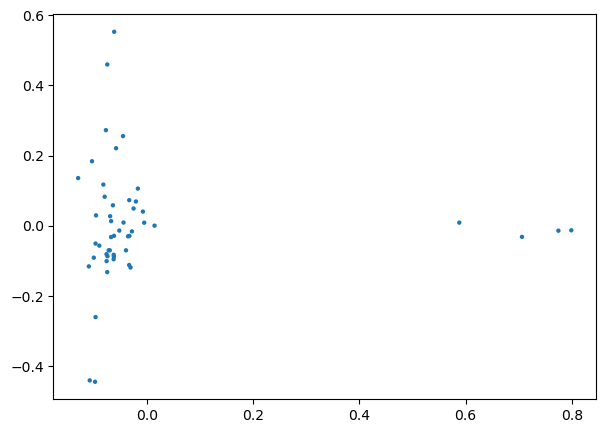

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Performed dimensionality reduction using TruncateSVD to obtain X_topics above.

# 2. Create an embedding using PCA
embedding = PCA(n_components=15, random_state=12).fit_transform(X_topics)

print(terms)

# 3. Visualize the embedding

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],s = 10, edgecolor='none')
plt.show()